# Data Gathering

We will start by getting the data from the 'fashion_dataset' directory.

In [23]:
!https://github.com/mohamed-12-4/DSAI--COSC-202-/raw/refs/heads/master/fashion_dataset.zip
!unzip fashion_dataset

/bin/bash: line 1: https://github.com/mohamed-12-4/DSAI--COSC-202-/raw/refs/heads/master/fashion_dataset.zip: No such file or directory
unzip:  cannot find or open fashion_dataset, fashion_dataset.zip or fashion_dataset.ZIP.


In [52]:
import os
import glob
import pandas as pd
import cv2
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def load_data(path: str) -> pd.DataFrame:
    """
    Load the data from the path and return a pandas dataframe with the images path and labels.
    param path: str: path to the images directory
    """
    images = []
    labels = []
    for image_path in glob.glob(path + '/*/*.png'):
        images.append(image_path)
        labels.append(image_path.split('/')[-2])

    images_df = pd.DataFrame({'images_path': images, 'labels': labels})
    return images_df



In [25]:
images_df = load_data('./fashion_dataset')

In [26]:
images_df

,images_path,labels
0,./fashion_dataset/7/1302.png,7
1,./fashion_dataset/7/39535.png,7
2,./fashion_dataset/7/41579.png,7
3,./fashion_dataset/7/3550.png,7
4,./fashion_dataset/7/42850.png,7
...,...,...
59995,./fashion_dataset/5/36777.png,5
59996,./fashion_dataset/5/4931.png,5
59997,./fashion_dataset/5/42537.png,5
59998,./fashion_dataset/5/44071.png,5


In [81]:
images_df.labels.value_counts()
images_df.labels = images_df.labels.astype(int)
type(images_df.labels[0])

numpy.int64

In [82]:
labels_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def class_to_name(label) -> str:
    """
    Convert the label to the name of the class
    param label: int: label of the class
    """

    return labels_map[label]

Sneaker


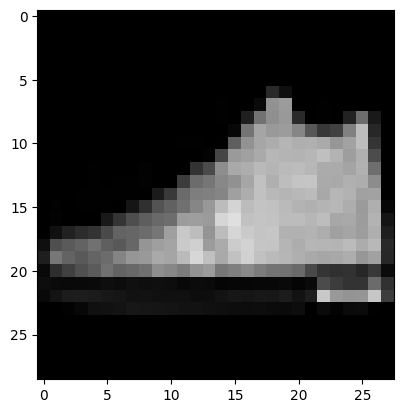

In [83]:
def view_image(path: str):
    """
    View the image from the path
    param path: str: path to the image
    """
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    img = cv2.imread(path)
    plt.imshow(img)

index = random.randint(0, len(images_df))
image_path = images_df.images_path[index]
label = images_df.labels[index]
print(class_to_name(label))
view_image(image_path)


<Axes: ylabel='count'>

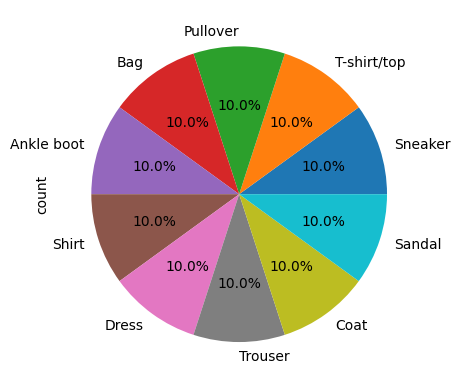

In [84]:
# plot a pie plot of the classes
images_df['class_name'] = images_df['labels'].apply(class_to_name)

images_df.class_name.value_counts().plot(kind='pie', autopct='%1.1f%%', )

# Trying different models

In [58]:
def create_dataset(df: pd.DataFrame, batch_size: int):
    """
    Create the dataset from the dataframe
    param df: pd.DataFrame: dataframe with the images path and labels
    """
    imagegen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)
    dataset = imagegen.flow_from_dataframe(
        df,
        x_col='images_path',
        y_col='labels',
        target_size=(28, 28),
        class_mode='raw',
        batch_size=batch_size,
    )
    return dataset



In [59]:
dataset = create_dataset(images_df, 64)

Found 60000 validated image filenames.


In [61]:
len(dataset)

938

In [73]:
dataset[0][1]

'4'

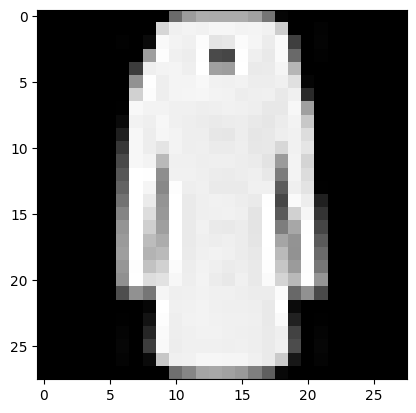

In [68]:
plt.imshow(dataset[0][0][0])